In [2]:
!pip install vectorbt


     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------  41.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/527.7 kB ? eta -:--:--
   ----------------------- ---------------- 307.2/527.7 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------  522.2/527.7 kB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 527.7/527.7 kB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 315.5/315.5 kB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/509.2 kB ? eta -:--:--
   --------------- ----------------------- 204.8/509.2 kB 13.0 MB/s eta 0:00:01
   ----------------------------------- ---- 450.6/509.2 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 509.2/509.2 kB 4.6 MB/s eta 0:00:00
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
spyder 5.4.3 requires jedi<0.19.0,>=0.17.2, but you have jedi 0.19.1 which is incompatible.
streamlit 1.30.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.


In [4]:
!pip install quantstats

   ---------------------------------------- 0.0/81.4 kB ? eta -:--:--
   ----------------------------------- ---- 71.7/81.4 kB 2.0 MB/s eta 0:00:01
   ----------------------------------- ---- 71.7/81.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 81.4/81.4 kB 757.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/123.4 kB ? eta -:--:--
   ---------------------------------------- 123.4/123.4 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.61
    Uninstalling yfinance-0.2.61:
      Successfully uninstalled yfinance-0.2.61


In [56]:
import numpy as np
import pandas as pd
import vectorbt as vbt
import quantstats

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

In [57]:
dataframe = pd.read_csv("BTCUSDT_5m_full_spot.csv", index_col=0, parse_dates=True)

In [58]:
df = dataframe[["open", "high", "low", "close", "volume"]].copy()

# ohlc_dict = {"open": "first", "high": "max", "low": "min", "close": "last"}

# df = df.resample("3T").apply(ohlc_dict)

In [59]:
df = df.tail(50000).copy(deep=True)

In [62]:
df

,open,high,low,close,volume,pct_change,pct_change_15,rsi,high_low,high_close_prev,low_close_prev,adx,sma,sma/close,corr,volatility,volatility_2,future_pct_change,future_signal
open_time,,,,,,,,,,,,,,,,,,,
2025-06-07 11:10:00,105175.52,105175.53,105122.13,105136.73,23.62883,-0.000369,0.002753,65.852200,53.40,0.01,53.39,35.651307,105075.779286,0.999420,0.708240,0.064858,0.088467,0.000799,1
2025-06-07 11:15:00,105136.74,105236.60,105136.73,105220.71,27.87151,0.000799,0.003176,71.975300,99.87,99.87,0.00,37.054308,105102.012143,0.998872,0.727090,0.065214,0.085818,0.000326,1
2025-06-07 11:20:00,105220.72,105264.00,105193.78,105254.98,28.92269,0.000326,0.003829,69.757861,70.22,43.29,26.93,38.960877,105123.868571,0.998754,0.745485,0.062467,0.093192,-0.000367,-1
2025-06-07 11:25:00,105254.98,105254.99,105216.37,105216.37,18.10178,-0.000367,0.002548,62.739206,38.62,0.01,38.61,38.670314,105137.192143,0.999247,0.735180,0.061986,0.091259,0.000379,1
2025-06-07 11:30:00,105216.37,105256.21,105174.01,105256.20,33.82182,0.000379,0.002155,58.318308,82.20,39.84,42.36,36.549461,105144.969286,0.998943,0.845287,0.055718,0.091763,-0.000398,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-27 23:00:00,91317.66,91476.00,91314.64,91475.98,27.54652,0.001734,-0.000299,49.652802,161.36,158.35,3.01,26.247400,91423.357143,0.999425,0.595218,0.124118,0.191726,-0.000868,-1
2025-11-27 23:05:00,91475.98,91519.08,91380.00,91396.60,26.55073,-0.000868,-0.000965,49.209009,139.08,43.10,95.98,25.269774,91421.900714,1.000277,0.564524,0.124736,0.192013,0.001241,1
2025-11-27 23:10:00,91396.61,91511.99,91377.60,91510.00,16.72945,0.001241,0.001017,53.194532,134.39,115.39,19.00,23.380693,91428.283571,0.999107,0.456771,0.129194,0.196260,-0.000590,-1


In [63]:
timeperiod = 14

# ==========================
# Helper functions to replicate TA-Lib
# ==========================

def calc_rsi(series, period):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


def calc_adx(df, period):
    # True Range
    df["high_low"] = df["high"] - df["low"]
    df["high_close_prev"] = (df["high"] - df["close"].shift()).abs()
    df["low_close_prev"] = (df["low"] - df["close"].shift()).abs()
    tr = df[["high_low", "high_close_prev", "low_close_prev"]].max(axis=1)

    # Directional Movement
    plus_dm = (df["high"] - df["high"].shift()).clip(lower=0)
    minus_dm = (df["low"].shift() - df["low"]).clip(lower=0)

    # Smooth the values
    atr = tr.rolling(period).mean()
    plus_di = 100 * (plus_dm.rolling(period).sum() / atr)
    minus_di = 100 * (minus_dm.rolling(period).sum() / atr)

    dx = (abs(plus_di - minus_di) / (plus_di + minus_di)) * 100
    adx = dx.rolling(period).mean()
    return adx


# ==========================
# ORIGINAL FEATURE ENGINEERING (recreated)
# ==========================

df["pct_change"] = df["close"].pct_change()
df["pct_change_15"] = df["close"].pct_change(15)

# RSI (same value as TA-Lib)
df["rsi"] = calc_rsi(df["close"], timeperiod)

# ADX (same logic as TA-Lib)
df["adx"] = calc_adx(df, timeperiod)

# SMA (same as TA-Lib SMA)
df["sma"] = df["close"].rolling(timeperiod).mean()

# SMA change ratio
df["sma/close"] = df["sma"] / df["close"]

# Correlation with SMA
df["corr"] = df["close"].rolling(timeperiod).corr(df["sma"])

# Volatility (same structure as your script)
df["volatility"] = df["pct_change"].rolling(timeperiod).std() * 100
df["volatility_2"] = df["pct_change_15"].rolling(timeperiod).std() * 100

# Future pct change (same)
df["future_pct_change"] = df["pct_change"].shift(-1)

# Original signal structure preserved EXACTLY
df["future_signal"] = np.where(
    df["future_pct_change"] > 0, 1,
    np.where(df["future_pct_change"] < 0, -1, 0)
)

df = df.replace([np.inf, -np.inf], np.nan).dropna()

# ==========================
# INPUT FEATURES (unchanged)
# ==========================

inputs = [
    "pct_change",
    "pct_change_15",
    "rsi",
    "adx",
    "sma/close",
    "corr",
    "volatility",
    "volatility_2",
]

output = "future_signal"


## Volume Profile Features

In [64]:
# ============================
# VOLUME PROFILE FEATURES (70% RANGE)
# ============================

def compute_volume_profile_features(df, lookback=288, bins=50):
    vah_list, val_list, poc_list = [], [], []

    for i in range(len(df)):
        if i < lookback:
            vah_list.append(np.nan)
            val_list.append(np.nan)
            poc_list.append(np.nan)
            continue

        segment = df.iloc[i-lookback:i].copy()

        segment["price_bin"] = pd.cut(
            segment["close"], bins=bins, labels=False, include_lowest=True
        )

        vp = segment.groupby("price_bin")["volume"].sum().sort_values(ascending=False)

        cumulative = vp.cumsum() / vp.sum()

        value_bins = cumulative[cumulative <= 0.70].index
        prices = segment.groupby("price_bin")["close"].mean()

        vah_list.append(prices.loc[value_bins].max())
        val_list.append(prices.loc[value_bins].min())
        poc_list.append(prices.loc[vp.idxmax()])

    df["VAH"] = vah_list
    df["VAL"] = val_list
    df["POC"] = poc_list

    # distances
    df["dist_VAH"] = df["close"] - df["VAH"]
    df["dist_VAL"] = df["close"] - df["VAL"]
    df["dist_POC"] = df["close"] - df["POC"]

    # MR zscore
    df["vp_std"] = df["close"].rolling(lookback).std()
    df["vp_zscore"] = (df["close"] - df["POC"]) / df["vp_std"]

    return df

df = compute_volume_profile_features(df, lookback=288, bins=60)
df = df.dropna()


In [66]:
inputs += [
    "dist_VAH",
    "dist_VAL",
    "dist_POC",
    "vp_zscore"
]


In [67]:
inputs = [
    "pct_change",
    "pct_change_15",
    "rsi",
    "adx",
    "sma/close",
    "corr",
    "volatility",
    "volatility_2",

    # 🔥 NEW VOLUME-PROFILE FEATURES
    "dist_VAH",
    "dist_VAL",
    "dist_POC",
    "vp_zscore"
]


## Backtest

In [68]:
import numpy as np
import pandas as pd

# ==========================================================
# BACKTEST ENGINE
# ==========================================================

def backtest_strategy(df, signal_col="signal", price_col="close"):
    df = df.copy()

    # Shift signal so trades occur on NEXT candle
    df["trade_signal"] = df[signal_col].shift(1)

    # Returns from price movement
    df["return"] = df[price_col].pct_change()

    # Strategy return
    df["strategy_return"] = df["trade_signal"] * df["return"]

    # Replace NaN
    df["strategy_return"] = df["strategy_return"].fillna(0)

    # Equity curve
    df["equity_curve"] = (1 + df["strategy_return"]).cumprod()

    # ----------------------------------------------------------
    # PERFORMANCE METRICS
    # ----------------------------------------------------------

    total_return = df["equity_curve"].iloc[-1] - 1
    annualized_return = (1 + total_return) ** (365 / (len(df) / (24*12))) - 1  # 5-min candles → 12 per hour

    # Sharpe ratio (252 trading days * 24h * 12 OHLC per hour)
    sharpe = (
        df["strategy_return"].mean() / df["strategy_return"].std()
    ) * np.sqrt(252*24*12) if df["strategy_return"].std() != 0 else 0

    # Max Drawdown
    rolling_max = df["equity_curve"].cummax()
    drawdown = df["equity_curve"] / rolling_max - 1
    max_drawdown = drawdown.min()

    # Win rate
    wins = (df["strategy_return"] > 0).sum()
    losses = (df["strategy_return"] < 0).sum()
    win_rate = wins / (wins + losses) if (wins + losses) > 0 else 0

    # Number of trades
    num_trades = (df[signal_col] != df[signal_col].shift()).sum()

    metrics = {
        "Total Return": total_return,
        "Annualized Return": annualized_return,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": max_drawdown,
        "Win Rate": win_rate,
        "Number of Trades": num_trades,
    }

    return df, metrics


## Merge and Train the data

In [69]:
# ===============================
# MERGE TRAIN & TEST AGAIN
# ===============================

combined = pd.concat([train_data, test_data])

# Replace 0 with flat
combined["signal"] = combined["signal"].replace(0, np.nan).ffill().fillna(0)

# Run Backtest
results_df, stats = backtest_strategy(combined, signal_col="signal", price_col="close")

print("========== PERFORMANCE METRICS ==========")
for k, v in stats.items():
    print(f"{k}: {v:.4f}")

results_df[["close", "equity_curve"]].tail()


========== PERFORMANCE METRICS ==========
Total Return: 0.9184
Annualized Return: 2.9370
Sharpe Ratio: 2.9907
Max Drawdown: -0.2475
Win Rate: 0.5143
Number of Trades: 10824.0000


,close,equity_curve
open_time,,
2025-11-27 23:00:00,91475.98,1.922880
2025-11-27 23:05:00,91396.60,1.921211
2025-11-27 23:10:00,91510.00,1.918828
2025-11-27 23:15:00,91456.01,1.919960
2025-11-27 23:20:00,91380.82,1.918381


## Equity Curve 

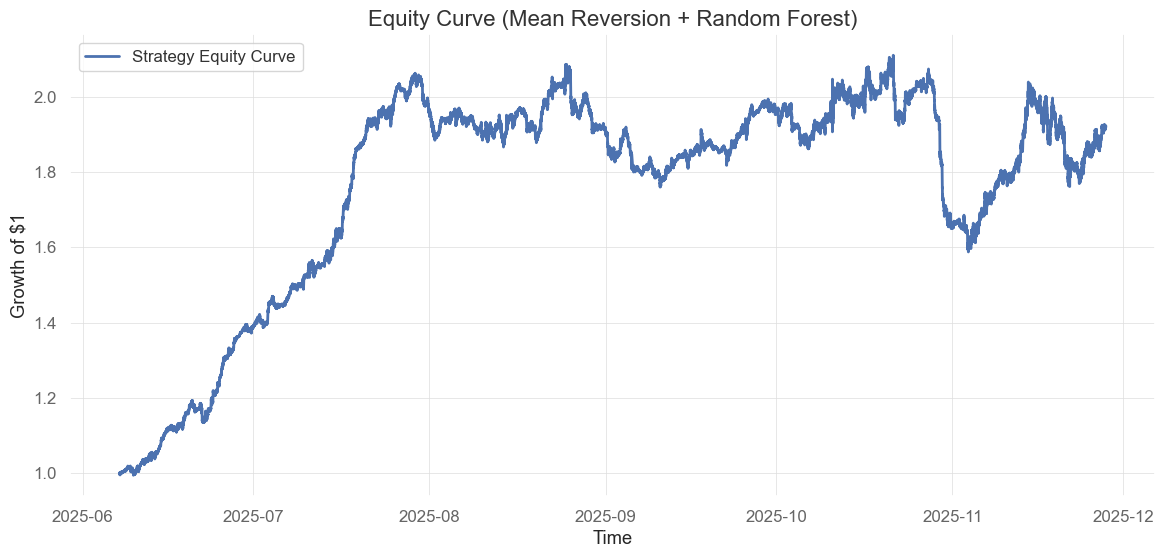

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(results_df["equity_curve"], label="Strategy Equity Curve", linewidth=2)
plt.title("Equity Curve (Mean Reversion + Random Forest)", fontsize=16)
plt.xlabel("Time")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.legend()
plt.show()


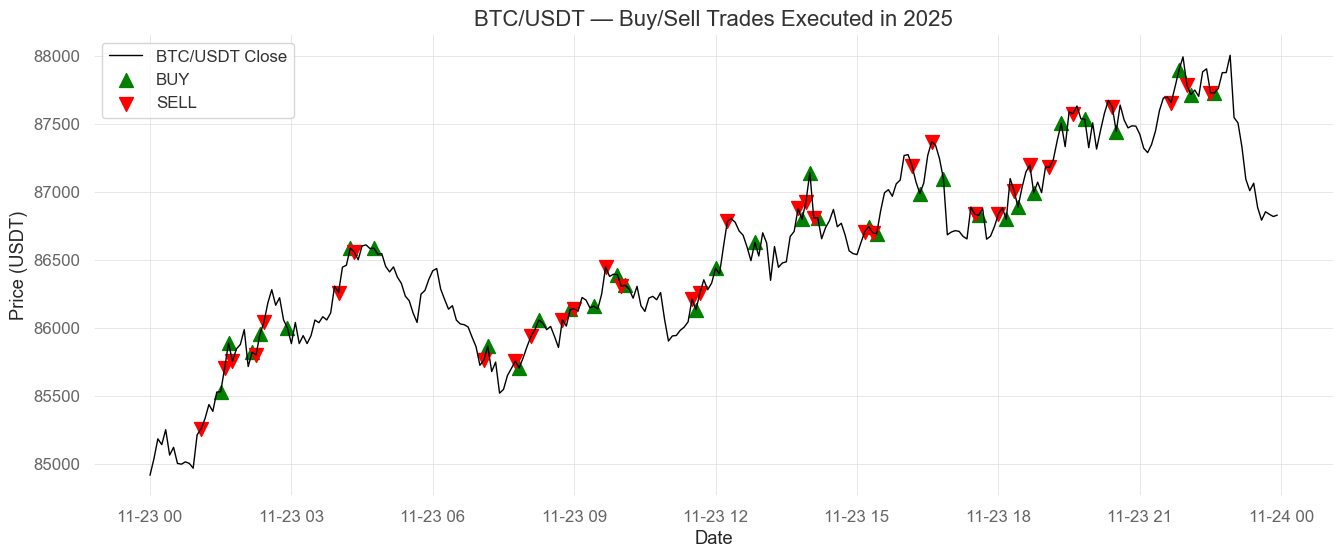

In [71]:
import matplotlib.pyplot as plt

# Ensure index is datetime
combined.index = pd.to_datetime(combined.index)

# ================================
# FILTER FOR YEAR 2025
# ================================
df_2025 = combined.loc["2025-11-23":"2025-11-23"].copy()

# Calculate signal changes (BUY/SELL points)
df_2025["signal_shift"] = df_2025["signal"].shift()

df_2025["buy"] = ((df_2025["signal_shift"] == -1) & (df_2025["signal"] == 1))
df_2025["sell"] = ((df_2025["signal_shift"] == 1) & (df_2025["signal"] == -1))

# ================================
# PLOT 2025 CHART WITH BUY/SELL MARKERS
# ================================
plt.figure(figsize=(16,6))
plt.plot(df_2025["close"], label="BTC/USDT Close", color="black", linewidth=1)

# BUY MARKERS (green up arrow)
plt.scatter(df_2025.index[df_2025["buy"]], 
            df_2025["close"][df_2025["buy"]], 
            marker="^", color="green", s=100, label="BUY")

# SELL MARKERS (red down arrow)
plt.scatter(df_2025.index[df_2025["sell"]], 
            df_2025["close"][df_2025["sell"]], 
            marker="v", color="red", s=100, label="SELL")

plt.title("BTC/USDT — Buy/Sell Trades Executed in 2025", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.grid(True)
plt.legend()
plt.show()


## Put stop loss of 0.3% and 0.6% return

In [72]:
import numpy as np
import pandas as pd

def backtest_with_sl_tp(
    df,
    signal_col="signal",
    price_col="close",
    sl_pct=0.003,   # 0.3% stop loss
    tp_pct=0.006    # 0.6% take profit
):
    """
    Trade-by-trade backtest with fixed % stop-loss and take-profit.
    Uses previous bar's signal to enter on current bar.
    """

    df = df.copy().sort_index()

    equity = 1.0
    equity_curve = []
    position = 0          # 0 = flat, 1 = long, -1 = short
    entry_price = np.nan

    trades = []           # store per-trade results

    # we use open/high/low/close for execution
    o = df["open"].values
    h = df["high"].values
    l = df["low"].values
    c = df[price_col].values
    sig = df[signal_col].values

    for i in range(1, len(df)):
        current_signal = sig[i-1]  # signal decided on previous bar

        if position == 0:
            # open a new trade only if previous signal is non-zero
            if current_signal != 0:
                position = current_signal
                entry_price = o[i]  # enter at next bar open

                # precompute SL and TP prices
                if position == 1:   # long
                    sl_price = entry_price * (1 - sl_pct)
                    tp_price = entry_price * (1 + tp_pct)
                else:               # short
                    sl_price = entry_price * (1 + sl_pct)
                    tp_price = entry_price * (1 - tp_pct)
        else:
            # manage open trade on bar i
            trade_closed = False
            exit_price = c[i]

            if position == 1:  # long
                # check SL first, then TP
                if l[i] <= sl_price:
                    exit_price = sl_price
                    trade_closed = True
                elif h[i] >= tp_price:
                    exit_price = tp_price
                    trade_closed = True
            else:              # short
                if h[i] >= sl_price:
                    exit_price = sl_price
                    trade_closed = True
                elif l[i] <= tp_price:
                    exit_price = tp_price
                    trade_closed = True

            if trade_closed:
                # pct return for the trade
                if position == 1:
                    trade_ret = (exit_price / entry_price) - 1.0
                else:
                    trade_ret = (entry_price / exit_price) - 1.0

                equity *= (1 + trade_ret)
                trades.append(trade_ret)

                position = 0
                entry_price = np.nan

        equity_curve.append(equity)

    # pad first value
    equity_curve = [1.0] + equity_curve
    df["equity_curve"] = equity_curve

    # ---- metrics ----
    if len(trades) > 0:
        avg_trade = np.mean(trades)
        win_rate = np.mean([1 if r > 0 else 0 for r in trades])
    else:
        avg_trade = 0.0
        win_rate = 0.0

    total_return = equity_curve[-1] - 1.0

    # approximate daily return assuming 12*24 bars per day
    bars_per_day = 12*24
    num_days = max(1, len(df) / bars_per_day)
    daily_return = (1 + total_return) ** (1/num_days) - 1

    metrics = {
        "Total Return": total_return,
        "Daily Return": daily_return,
        "Num Trades": len(trades),
        "Average Trade %": avg_trade,
        "Win Rate": win_rate,
    }

    return df, metrics


In [73]:
results_sl_tp, stats_sl_tp = backtest_with_sl_tp(
    combined,
    signal_col="signal",
    price_col="close",
    sl_pct=0.003,   # 0.3% loss
    tp_pct=0.006    # 0.6% gain
)

print("===== SL 0.3% / TP 0.6% RESULTS =====")
for k, v in stats_sl_tp.items():
    print(f"{k}: {v:.4f}")


===== SL 0.3% / TP 0.6% RESULTS =====
Total Return: 1.1409
Daily Return: 0.0044
Num Trades: 2914.0000
Average Trade %: 0.0003
Win Rate: 0.3624


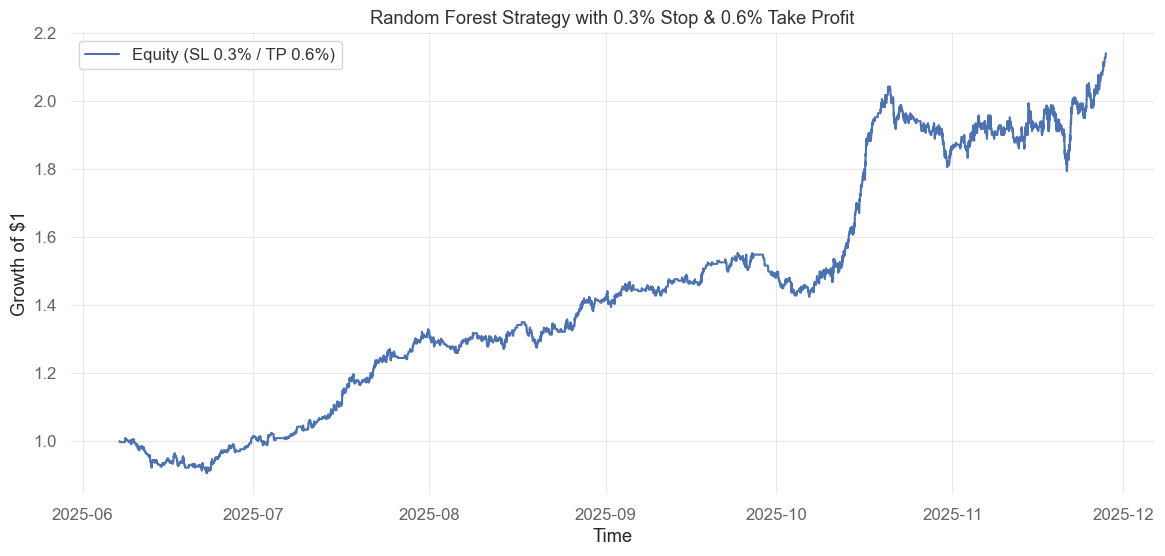

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(results_sl_tp["equity_curve"], label="Equity (SL 0.3% / TP 0.6%)")
plt.title("Random Forest Strategy with 0.3% Stop & 0.6% Take Profit")
plt.xlabel("Time")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.legend()
plt.show()


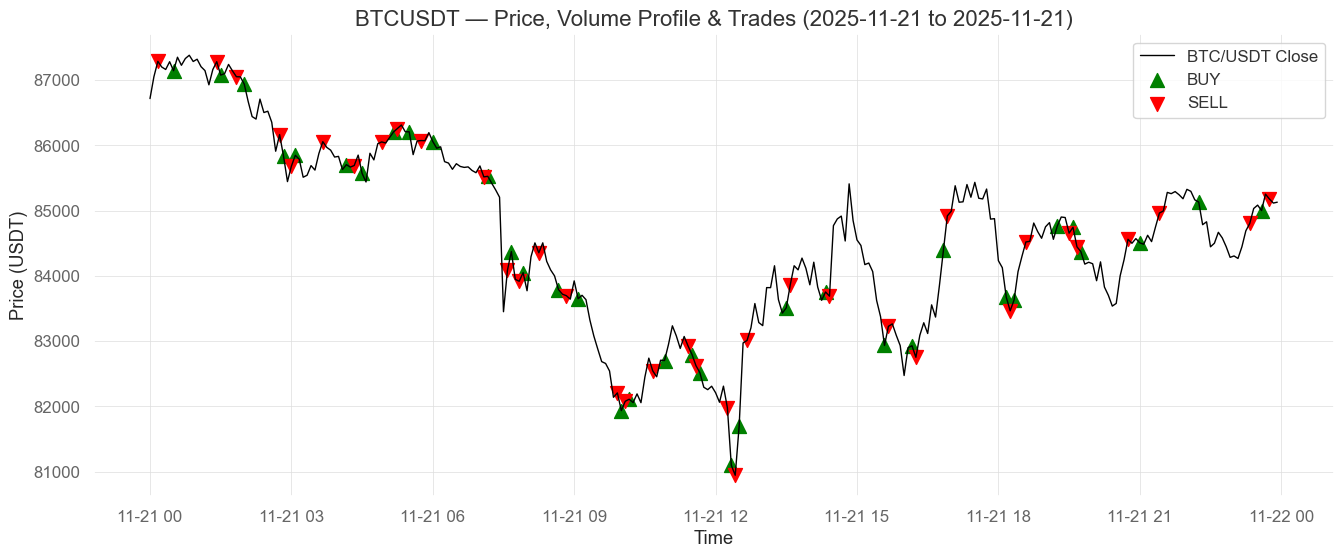

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure index is datetime
combined.index = pd.to_datetime(combined.index)

# === choose a date range you care about ===
start = "2025-11-21"
end   = "2025-11-21"

sub = combined.loc[start:end].copy()

# If you have timezone info, strip it for plotting
if hasattr(sub.index, "tz"):
    try:
        sub.index = sub.index.tz_localize(None)
    except TypeError:
        pass

# Recompute buy/sell from signal (if not already done)
sub["signal_shift"] = sub["signal"].shift()
sub["buy"] = (sub["signal_shift"] == -1) & (sub["signal"] == 1)
sub["sell"] = (sub["signal_shift"] == 1) & (sub["signal"] == -1)

plt.figure(figsize=(16,6))

# Price
plt.plot(sub.index, sub["close"], color="black", linewidth=1, label="BTC/USDT Close")

# Volume profile levels
if {"VAH","VAL","POC"} <= set(sub.columns):
    plt.plot(sub.index, sub["VAH"], "--", label="VAH (70% High)")
    plt.plot(sub.index, sub["VAL"], "--", label="VAL (70% Low)")
    plt.plot(sub.index, sub["POC"], ":",  label="POC")

# BUY markers
plt.scatter(sub.index[sub["buy"]],
            sub["close"][sub["buy"]],
            marker="^", color="green", s=100, label="BUY")

# SELL markers
plt.scatter(sub.index[sub["sell"]],
            sub["close"][sub["sell"]],
            marker="v", color="red", s=100, label="SELL")

plt.title(f"BTCUSDT — Price, Volume Profile & Trades ({start} to {end})", fontsize=16)
plt.xlabel("Time")
plt.ylabel("Price (USDT)")
plt.grid(True)
plt.legend()
plt.show()
